# Explore here

In [2]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import *
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.model_selection import train_test_split

In [3]:
# VER BASE DE DATOS:

df_housing = pd.read_csv("../data/raw/housing.csv")
df_housing

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [4]:
# Selección de las variables de interés:
X = df_housing[['MedInc', 'Longitude', 'Latitude']]
X

,MedInc,Longitude,Latitude
0,8.3252,-122.23,37.88
1,8.3014,-122.22,37.86
2,7.2574,-122.24,37.85
3,5.6431,-122.25,37.85
4,3.8462,-122.25,37.85
...,...,...,...
20635,1.5603,-121.09,39.48
20636,2.5568,-121.21,39.49
20637,1.7000,-121.22,39.43
20638,1.8672,-121.32,39.43


In [5]:
# Partición de los datos sobre las variables que nos interesan:
X_train, X_test = train_test_split(X, test_size=0.2, random_state=42)

In [6]:
# Escalado de los datos para KMeans:
scaler_kmeans = StandardScaler()
X_train_scaled = scaler_kmeans.fit_transform(X_train)
X_test_scaled = scaler_kmeans.transform(X_test)

# Entrenamiento del modelo KMeans con datos escalados:
model = KMeans(n_clusters=6, random_state=42)
model.fit(X_train_scaled)

# Predecir las etiquetas de los clusters:
clusters_train = model.labels_
clusters_test = model.predict(X_test_scaled)

In [7]:
# Entrenamiento del modelo KMeans:
model = KMeans(n_clusters = 6, random_state = 42)
model.fit(X_train)

# Predecir las etiquetas de los clusters:
clusters_train = model.labels_
clusters_train

array([3, 1, 1, ..., 3, 0, 5], shape=(16512,), dtype=int32)

In [8]:
clusters_test = model.predict(X_test)
clusters_test

array([3, 3, 5, ..., 4, 5, 1], shape=(4128,), dtype=int32)

In [9]:
# Crear columna vacía para clusters en df original
df_housing['cluster'] = -1  # valor temporal para indicar sin asignar

# Asignar clusters usando los índices originales
df_housing.loc[X_train.index, 'cluster'] = clusters_train
df_housing.loc[X_test.index, 'cluster'] = clusters_test

# Convertir a categoria:
df_housing['cluster'] = df_housing['cluster'].astype('category')

In [10]:
df_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   MedInc       20640 non-null  float64 
 1   HouseAge     20640 non-null  float64 
 2   AveRooms     20640 non-null  float64 
 3   AveBedrms    20640 non-null  float64 
 4   Population   20640 non-null  float64 
 5   AveOccup     20640 non-null  float64 
 6   Latitude     20640 non-null  float64 
 7   Longitude    20640 non-null  float64 
 8   MedHouseVal  20640 non-null  float64 
 9   cluster      20640 non-null  category
dtypes: category(1), float64(9)
memory usage: 1.4 MB


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

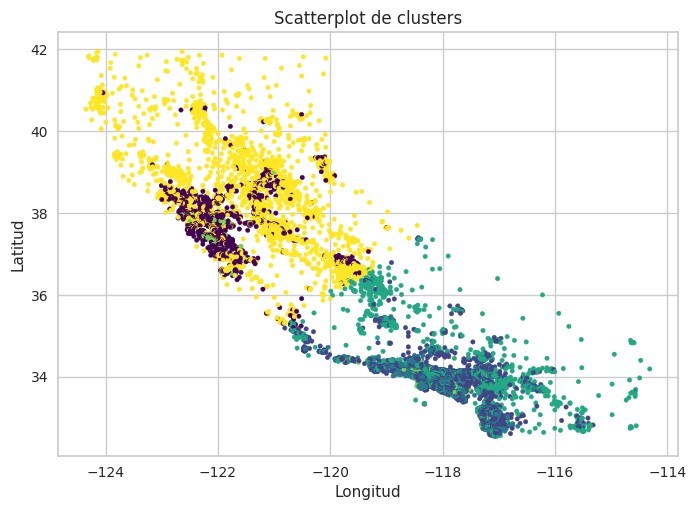

In [11]:
plt.scatter(x=df_housing['Longitude'],
            y=df_housing['Latitude'],
            c=df_housing['cluster'].cat.codes,
            cmap='viridis',
            s=10)
plt.title("Scatterplot de clusters")
plt.xlabel("Longitud")
plt.ylabel("Latitud")
plt.show()

- Se puede observar que el modelo KMeans ha identificado varios grupos o clusters que se distribuyen espacialmente con cierta lógica. Parece que los clusters separan zonas con cierta coherencia geográfica, lo cual es positivo
- hay principalmente 3 colores dominantes visibles en la gráfica (aunque se han elegido 6 clusters en el código, puede que algunos sean muy pequeños o estén superpuesto ya que hay conjuntos de pisos (rascacielos) y hay casas que se sobreponen en la misma Longitud y Latitud.
- En algunas zonas (como al centro-izquierda) los puntos de diferentes clusters se superponen un poco. Esto puede indicar que el modelo tiene cierta dificultad para separar en esas áreas con los datos que tenemos o lo dicho anteriormente, estar todos ubicados en el mismo edificio.


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

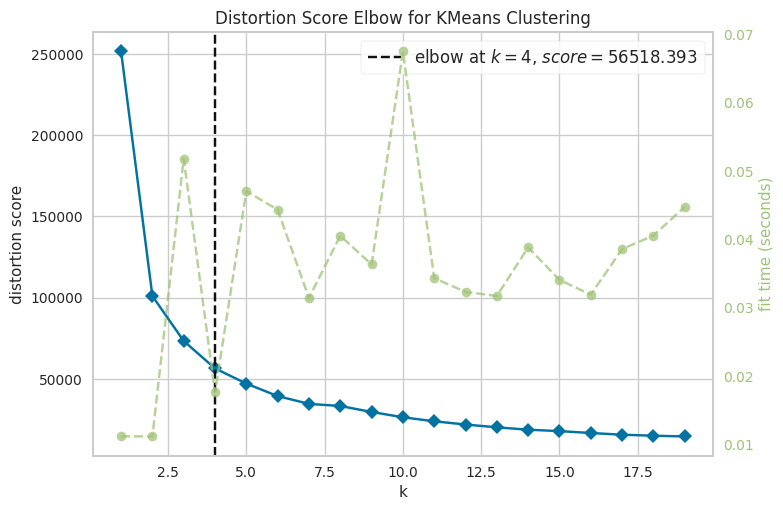

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [12]:
# Partición de los datos para el análisis del codo:

elbow_vis = KElbowVisualizer(KMeans(random_state=42), k=(1, 20))
elbow_vis.fit(X)
elbow_vis.show()

- El codo se localiza en k = 4.
- Esto indica que a partir de ese punto la mejora al aumentar k es marginal. 
- En definitiva, elegir 4 clusters ofrece un buen equilibrio entre simplicidad y capacidad de agrupación.

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

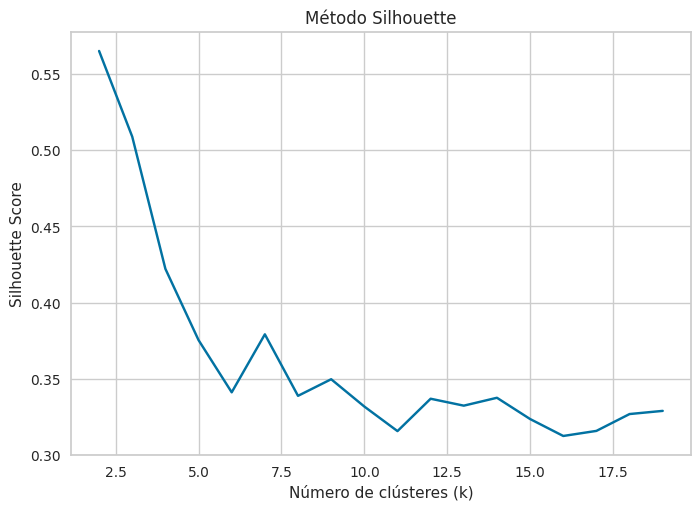

In [13]:
# Partición de los datos para el ánalisis de la silueta:

# Definir el rango de número de clústeres para probar
k_values = range(2, 20)

# Inicializar listas para almacenar los valores de silhouette para cada número de clústeres
silhouette_scores = []

# Probar diferentes valores de k
for k in k_values:
  cluster_labels = KMeans(n_clusters=k, random_state=42).fit_predict(X_train)
  silhouette_scores.append(silhouette_score(X_train, cluster_labels))

plt.plot(k_values, silhouette_scores)
plt.xlabel('Número de clústeres (k)')
plt.ylabel('Silhouette Score')
plt.title('Método Silhouette')
plt.show()

- El valor más alto del Silhouette Score se da en  k = 2, indicando que esa es laconfiguración ofrece la mejor separación entre clústeres. 

- A medida que k aumenta, el score disminuye, lo que sugiere una menor cohesión interna o mayor solapamiento entre grupos. 

- Aunque k = 4 fue el óptimo por el método del codo, desde esta métrica puede considerarse que k = 2 produce clústeres más compactos y separados.

In [14]:
# Partición de los datos para nuestros datos con K-Vecinos:

X1 = df_housing[['MedInc', 'Longitude', 'Latitude']]
y1 = df_housing['cluster'].cat.codes

X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X1, y1, test_size=0.2, random_state=42)

K-VECINOS:

In [15]:
# Entrenamiento del modelo K-Vecinos:

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_s, y_train_s)  
y_pred_s = knn.predict(X_test_s)

print("Accuracy:", accuracy_score(y_test_s, y_pred_s))      
print("Confusion Matrix:\n", confusion_matrix(y_test_s, y_pred_s))
print("Classification Report:\n", classification_report(y_test_s, y_pred_s))    


Accuracy: 0.9920058139534884
Confusion Matrix:
 [[ 554    1    0    0    0    6]
 [   0  977    0    6    0    0]
 [   0    6  293    0    0    0]
 [   0    4    0 1104    0    3]
 [   0    0    0    0   62    0]
 [   2    1    0    4    0 1105]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99       561
           1       0.99      0.99      0.99       983
           2       1.00      0.98      0.99       299
           3       0.99      0.99      0.99      1111
           4       1.00      1.00      1.00        62
           5       0.99      0.99      0.99      1112

    accuracy                           0.99      4128
   macro avg       0.99      0.99      0.99      4128
weighted avg       0.99      0.99      0.99      4128



El modelo de K-Vecinos aplicado sobre los clusters generados por K-Means muestra un rendimiento excelente, con una accuracy del 99.2%. La matriz de confusión revela muy pocos errores de clasificación, lo que indica que los clústeres están bien definidos y son fácilmente reconocibles. Además, los valores de precision, recall y f1-score son cercanos a 1 para todas las clases, lo que refuerza la consistencia del modelo. Estos resultados confirman que la estructura de los clústeres es estable y reproducible